# FIFA 20

### To group the soccer players in FIFA 20 with similar skillsets using Clustering Algorithms

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FIFA 20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
df.shape

(18278, 104)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
df.describe()  

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


# Data Cleaning

## Removal of duplicates

In [6]:
#sum(df.duplicated())
df.duplicated(subset='short_name').sum()

924

In [7]:
#pd.set_option('display.max_rows', None)
df['short_name'].value_counts()

J. Rodríguez    11
Paulinho         9
J. García        8
J. Williams      7
J. Hernández     7
                ..
M. Modolo        1
Ramón Folch      1
G. Deegan        1
Kwon Tae Ahn     1
O. Al Khalaf     1
Name: short_name, Length: 17354, dtype: int64

In [3]:
# removing the duplicates
df1 = df.drop_duplicates(subset=["short_name"], keep='first')
print("df1:", len(df1))
print("df:", len(df))

df1: 17354
df: 18278


In [9]:
df1['short_name'].value_counts()

Gerard Valentín    1
A. Kovácsik        1
Kaíque Mutto       1
H. Hopper          1
P. Cutrone         1
                  ..
M. Egbo            1
S. Diop            1
Milton Raphael     1
F. Cubero          1
O. Al Khalaf       1
Name: short_name, Length: 17354, dtype: int64

In [4]:
#Removing redundant columns 
cols_not_req = ['dob','sofifa_id','player_url','long_name','body_type','real_face', 'joined']
df1.drop(cols_not_req, axis = 1, inplace=True)
df1.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Converting Non-Numeric values

In [5]:
# Columns with Non-numeric values
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
df1[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
# split the string in '+' and take only the value of str in index[0].
for col in columns:
    df1[col] = df1[col].str.split('+').str[0] 

    
 # convert all the NaN into 0    
df1[columns] = df1[columns].fillna(0)

In [7]:
#changing the dtype to 'int'
df1[columns] = df1[columns].astype('int') # convert str to int
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17354 entries, 0 to 18277
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  17354 non-null  object 
 1   age                         17354 non-null  int64  
 2   height_cm                   17354 non-null  int64  
 3   weight_kg                   17354 non-null  int64  
 4   nationality                 17354 non-null  object 
 5   club                        17354 non-null  object 
 6   overall                     17354 non-null  int64  
 7   potential                   17354 non-null  int64  
 8   value_eur                   17354 non-null  int64  
 9   wage_eur                    17354 non-null  int64  
 10  player_positions            17354 non-null  object 
 11  preferred_foot              17354 non-null  object 
 12  international_reputation    17354 non-null  int64  
 13  weak_foot                   173

## Handling Missing Values

In [8]:
# Find out the number of Numerical and categorical features
num_data = df1.select_dtypes(include = [np.number])
cat_data = df1.select_dtypes(exclude = [np.number])
print("There are {0} Numerical features and {1} categorical feature in the dataset".format(num_data.shape[1], cat_data.shape[1]))

There are 86 Numerical features and 11 categorical feature in the dataset


In [15]:
# Checking null values
pd.set_option('display.max_rows', None)
df1.isnull().sum() 

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1237
player_tags                   15905
team_position                   232
team_jersey_number              232
loaned_from                   16359
contract_valid_until            232
nation_position               16248
nation_jersey_number          16248
pace                           1925
shooting                       1925
passing                        1925
dribbling                   

In [16]:
#sns.heatmap(df1.isnull())

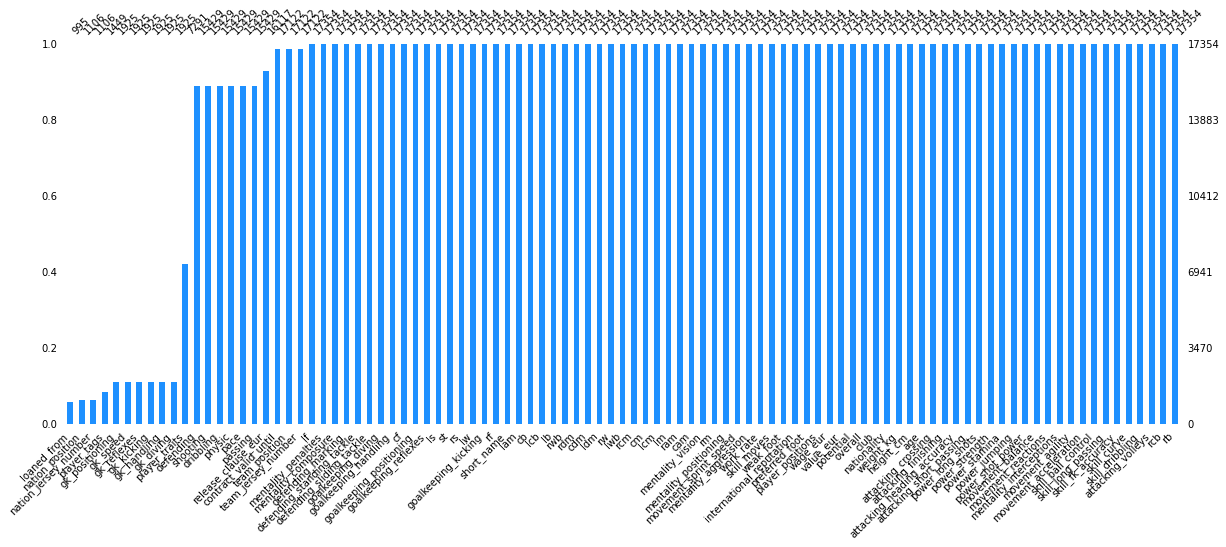

In [17]:
missingno.bar(df1, color="dodgerblue", sort="ascending", figsize=(20,7), fontsize=10, labels=True);

In [9]:
# Drop the columns with more missing values

df1.drop(['loaned_from','nation_position','nation_jersey_number', 'player_tags', 'gk_diving', 'gk_kicking','gk_reflexes', 'gk_handling', 'gk_positioning', 'gk_speed','player_traits'], axis=1, inplace=True)
df1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66,61,61,61,66,61,46,46,46,61
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66,63,63,63,66,61,49,49,49,61


In [10]:
# Handling missing values with mean for numerical value
null_columns=df1.select_dtypes(include = [np.number]).columns[df1.select_dtypes(include = [np.number]).isnull().any()]
        
for att in null_columns:
    df1[att] = df1[att].fillna(df1[att].mean())
    

In [11]:
# Handling the missing values for categorical value
df1['team_position'].value_counts()

SUB    7408
RES    2771
LCB     634
GK      631
RCB     630
RB      542
LB      541
ST      429
LCM     397
RCM     387
RM      382
LM      376
CAM     302
RDM     232
LDM     230
LS      188
RS      187
CDM     176
LW      157
RW      155
CB       94
CM       70
RWB      56
LWB      55
LAM      23
RAM      20
LF       19
RF       17
CF       13
Name: team_position, dtype: int64

In [12]:
df1['team_position'].fillna('SUB', inplace = True)
df1.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
lb             0
lcb            0
cb             0
rcb            0
rb             0
Length: 86, dtype: int64

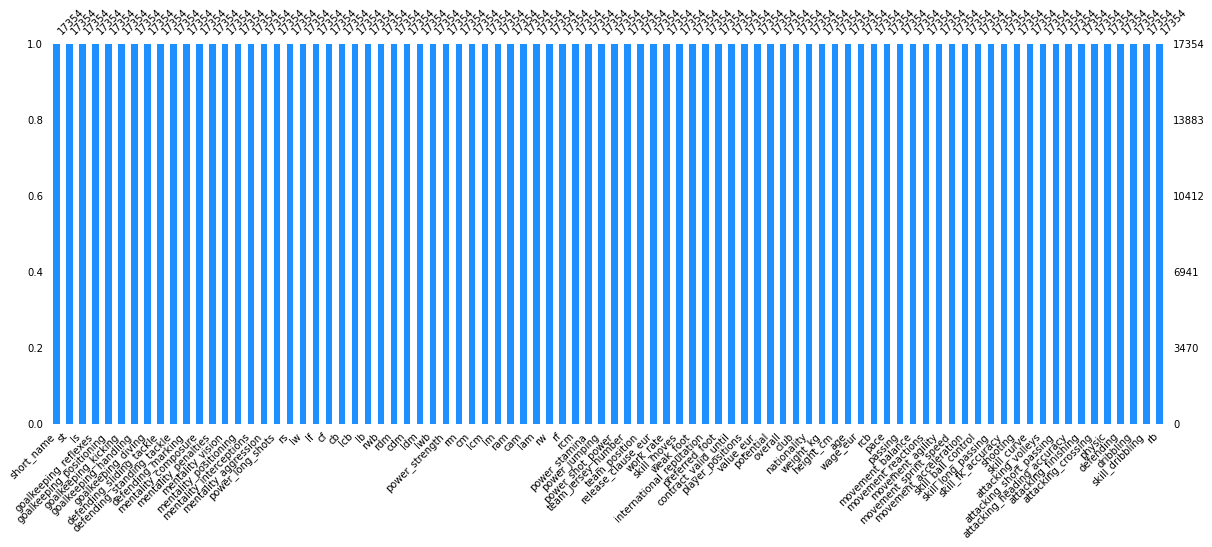

In [21]:
missingno.bar(df1, color="dodgerblue", sort="ascending", figsize=(20,7), fontsize=10, labels=True);

# Handling Categorical Data

In [13]:
cat_data = df1.select_dtypes(exclude = [np.number])
cat_data.columns

Index(['short_name', 'nationality', 'club', 'player_positions',
       'preferred_foot', 'work_rate', 'team_position'],
      dtype='object')

In [14]:
# Player_positions:

# We notice players have one position, others have two and some even three..
# For the scope of this project, positions will be grouped in four categories:

# Attackers: ST, LW, RW, CF
# Midfielders: CAM, LM, CM, RM, CDM
# Defenders: LWB, RWB, LB, CB, RB
# Goalkeepers: GK

def combine_positions(row):
    # There are 15 different positions
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        # If a player has two positions the first one will be considered as their
        # position, of course, players with only one position won't be affected
        position = positions[0]
        if position in ['ST', 'LW', 'RW','CF']: #4
            return 0 #ATTACKER
        elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
            return 1 #MIDFIELDER
        elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
            return 2 #DEFENDER
        elif position in ['GK']: #1
            return 3 #GOALKEEPER
    else: # If player has three possible positions
        position_count = [0, 0, 0, 0] 
        for position in positions:
            if position in ['ST', 'LW', 'RW','CF']: #4
                index = 0 #ATTACKER
            elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
                index = 1 #MIDFIELDER
            elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
                index = 2 #DEFENDER
            elif position in ['GK']: #1
                index = 3 #GOALKEEPER
            else:  
                continue 
            position_count[index] += 1 
        # This will count which was the most repeated position and assign it to the player
        return position_count.index(max(position_count))

df1['player_positions'] = df1.apply(combine_positions, axis=1)
df1['player_positions']

0        0
1        0
2        0
3        3
4        0
        ..
18272    3
18273    2
18274    2
18276    1
18277    1
Name: player_positions, Length: 17354, dtype: int64

In [15]:
# Work_rate
df1['work_rate'] = df1['work_rate'].str.split('/').str[0]
df1['work_rate']

0        Medium
1          High
2          High
3        Medium
4          High
          ...  
18272    Medium
18273    Medium
18274    Medium
18276       Low
18277    Medium
Name: work_rate, Length: 17354, dtype: object

In [16]:
# convert categorical data into numerical data using label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df1.nationality = le.fit_transform(df1.nationality)
df1.club = le.fit_transform(df1.club)
df1.preferred_foot = le.fit_transform(df1.preferred_foot)
df1.team_position = le.fit_transform(df1.team_position)
df1.work_rate = le.fit_transform(df1.work_rate)

In [17]:
# Again checking the number of Numerical and categorical features
num_data = df1.select_dtypes(include = [np.number])
cat_data = df1.select_dtypes(exclude = [np.number])
print("There are {0} Numerical features and {1} categorical feature in the dataset".format(num_data.shape[1], cat_data.shape[1]))

There are 85 Numerical features and 1 categorical feature in the dataset


# Exploratory Data Analysis

<AxesSubplot:xlabel='count', ylabel='nationality'>

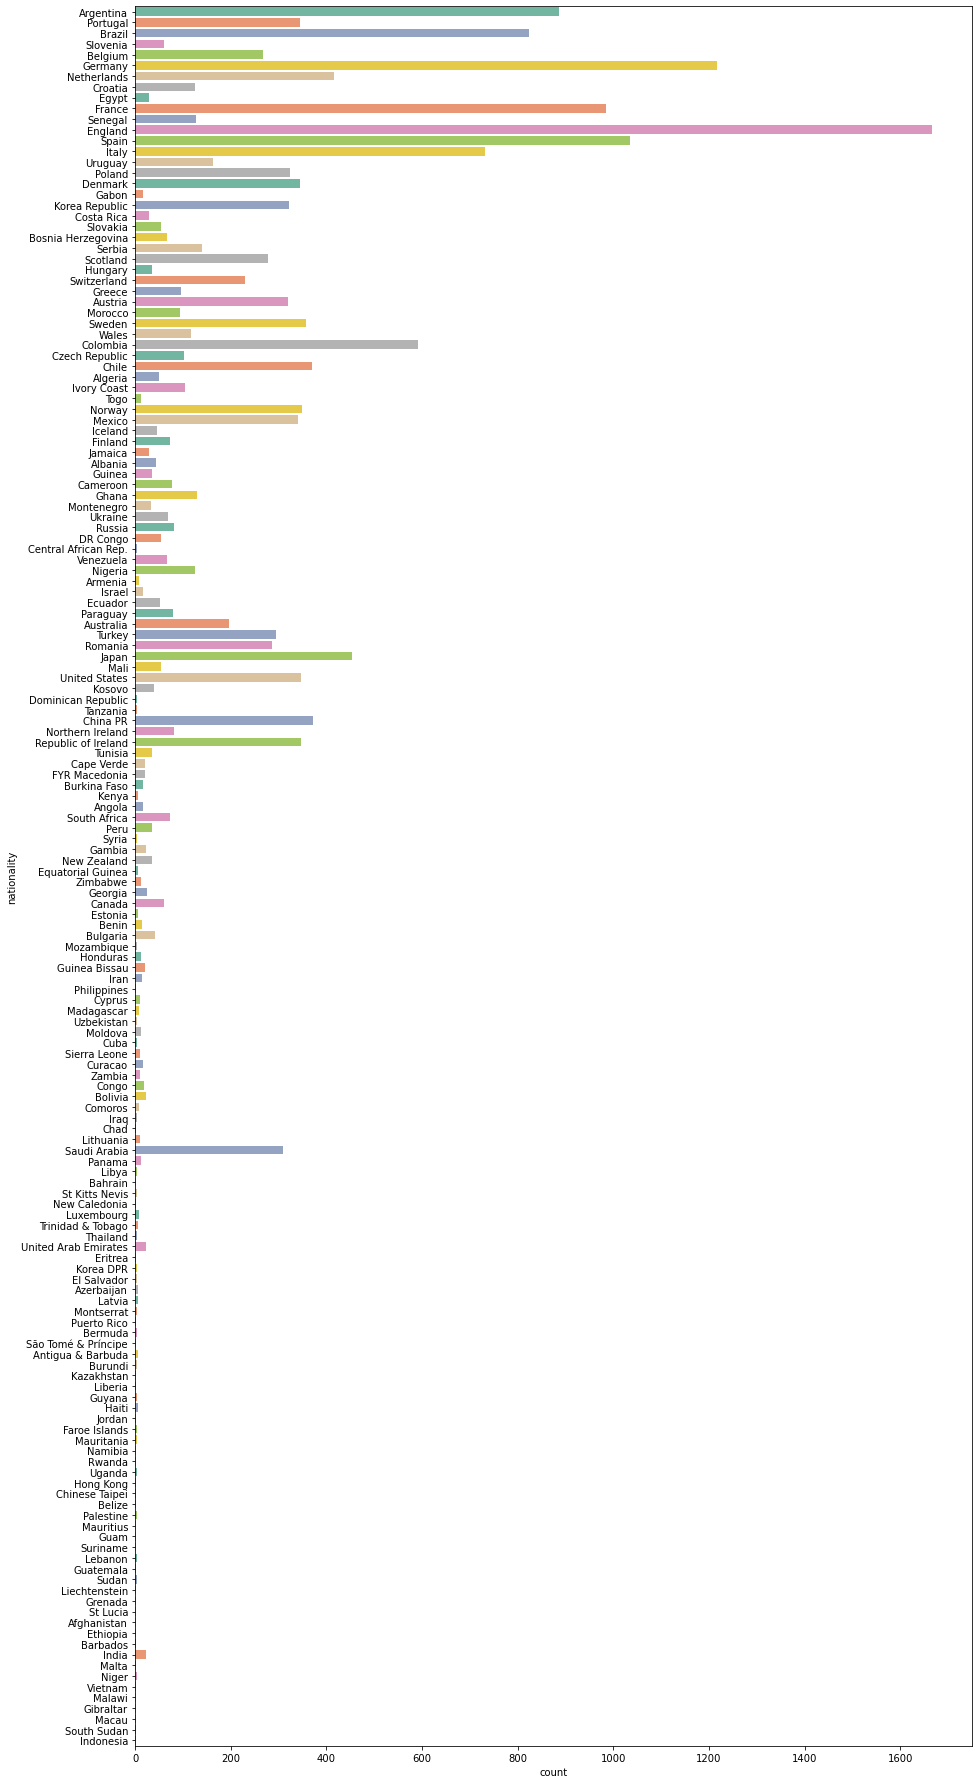

In [49]:
plt.figure(figsize=(15,32))

sns.countplot(y=df.nationality,palette="Set2")

In [50]:
d1=df.loc[df['international_reputation'] == 5]
d1[['short_name','age','club','nationality','value_eur','skill_moves']].style.hide_index()

short_name,age,club,nationality,value_eur,skill_moves
L. Messi,32,FC Barcelona,Argentina,95500000,4
Cristiano Ronaldo,34,Juventus,Portugal,58500000,5
Neymar Jr,27,Paris Saint-Germain,Brazil,105500000,5
L. Suárez,32,FC Barcelona,Uruguay,53000000,3
M. Neuer,33,FC Bayern München,Germany,32000000,1
Z. Ibrahimović,37,LA Galaxy,Sweden,14000000,5


### From the above L.Messi, Cristiano Ronaldo, Neymar Jr, L. Suárez, M. Neuera and Z. Ibrahimović are the top players in the world in the year of 2020.
    1. Neymar Jr is the most expensive player in 2020 FIFA world cup and He is the youngest among all the top six players.
    2. M. Neuer is the only player who has only one skill move.
    3. Z. Ibrahimović has the least value in the list.

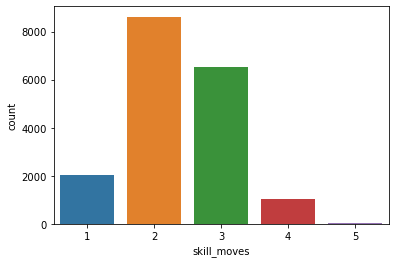

In [52]:
sns.countplot(df.skill_moves)
plt.show()

#### As we can see from the above graph, a very few people have 5 types of skill moves and majority of the players have only two skill moves.

In [53]:
# The top 5 expensive players in 2020.
d3=df[['short_name','value_eur']].sort_values(by='value_eur',ascending= False).head(5)
d3.style.hide_index()

short_name,value_eur
Neymar Jr,105500000
L. Messi,95500000
K. Mbappé,93500000
K. De Bruyne,90000000
E. Hazard,90000000


Skewness of age is 0.38061976075931975


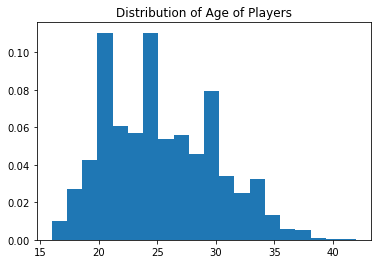

In [54]:
plt.hist(df['age'], density=True, bins = 20)
plt.title('Distribution of Age of Players')

print("Skewness of age is", df['age'].skew())


In [91]:
print("The youngest players are ")
print(df[df.age == df.age.min()][['short_name', 'age', 'overall']])

The youngest players are 
          short_name  age  overall
4764       A. Hložek   16       70
6630     Fábio Silva   16       68
12158      E. Millot   16       63
12160    S. Esposito   16       63
14626     A. Velasco   16       60
17614    D. Obbekjær   16       53
17782    S. Anderson   16       52
17827       D. Burns   16       52
18031  O. Stefánsson   16       51
18171    J. Starbuck   16       49
18242     R. Wikberg   16       48
18243   E. Sartorius   16       48


In [90]:
print("The oldest players are ")
print(df.loc[df['age'] == df['age'].max()][['short_name','age','overall']])

The oldest players are 
         short_name  age  overall
11832      C. Muñoz   42       64
13003  H. Sulaimani   42       63


In [69]:
# The age of the player who has the highest overall score
df1.loc[df1['overall'] == df1['overall'].max()][['short_name', 'age', 'overall']]

,short_name,age,overall
0,L. Messi,32,94


<AxesSubplot:xlabel='age', ylabel='potential'>

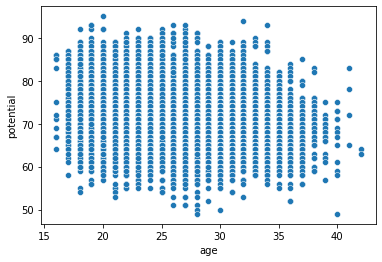

In [55]:
sns.scatterplot(df.age,df.potential)

#### As we can see, the players above age 35 have relatively low potential than the younger ones.

In [17]:
# best players from each position with their age, club, and nationality based on their OVERALL scores

df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions', 'short_name',
                                                               'age', 'club', 'nationality']].style.background_gradient('Reds')

,player_positions,short_name,age,club,nationality
121,CAM,N. Fekir,25,Real Betis,France
672,"CAM, CDM",Borja Valero,34,Inter,Spain
7223,"CAM, CDM, CB",M. Bodmer,36,Amiens SC,France
1849,"CAM, CDM, CM",S. Armstrong,27,Southampton,Scotland
458,"CAM, CF",J. Quintero,26,River Plate,Colombia
3499,"CAM, CF, CM",P. Gerkens,24,RSC Anderlecht,Belgium
6556,"CAM, CF, LM",H. Yamada,30,Júbilo Iwata,Japan
5812,"CAM, CF, LW",G. Kharaishvili,22,IFK Göteborg,Georgia
5629,"CAM, CF, RM",K. Shibasaki,34,Sanfrecce Hiroshima,Japan
2599,"CAM, CF, RW",S. Vilakazi,29,South Africa,South Africa


In [18]:
# best players from each positions with their age, nationality, club based on their POTENTIAL scores

df.iloc[df.groupby(df['player_positions'])['potential'].idxmax()][['player_positions', 'short_name',
                                                            'age', 'club', 'nationality']].style.background_gradient('Blues')

,player_positions,short_name,age,club,nationality
121,CAM,N. Fekir,25,Real Betis,France
2717,"CAM, CDM",B. Mensah,24,Kayserispor,Ghana
7223,"CAM, CDM, CB",M. Bodmer,36,Amiens SC,France
2207,"CAM, CDM, CM",A. Browne,24,Preston North End,Republic of Ireland
458,"CAM, CF",J. Quintero,26,River Plate,Colombia
3499,"CAM, CF, CM",P. Gerkens,24,RSC Anderlecht,Belgium
15994,"CAM, CF, LM",O. Deman,19,KSV Cercle Brugge,Belgium
5812,"CAM, CF, LW",G. Kharaishvili,22,IFK Göteborg,Georgia
5629,"CAM, CF, RM",K. Shibasaki,34,Sanfrecce Hiroshima,Japan
2599,"CAM, CF, RW",S. Vilakazi,29,South Africa,South Africa


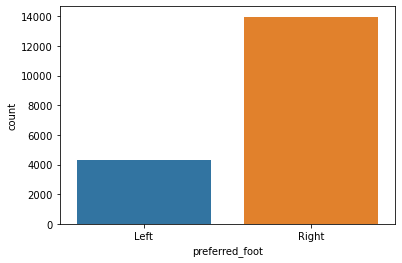

In [104]:
sns.countplot(df.preferred_foot)
plt.show()

#### Majority of the players use their right foot.

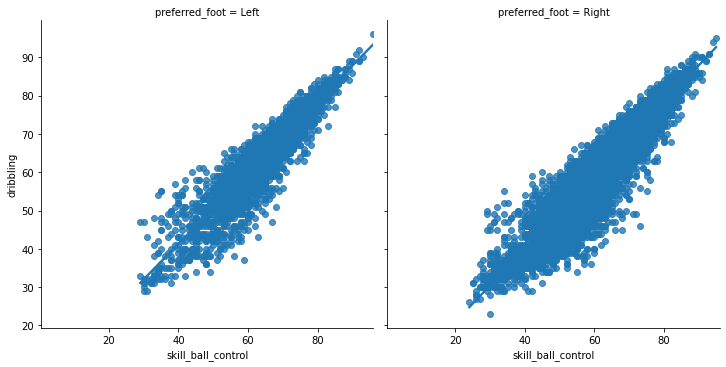

In [103]:
# comparing the performance of left-footed and right-footed footballers
# ball control vs dribbing

sns.lmplot(x = 'skill_ball_control', y = 'dribbling', data = df, col = 'preferred_foot')
plt.show()

In [61]:
#Players with Highest Shooting rate
player_shooting = df1[['short_name', 'shooting']]
player_shooting.sort_values(by =['shooting'], ascending=False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
19,L. Suárez,89.0


#### As we see that Cristiano Ronaldo has the highest shooting rate of 93.0 and L.Messi with 92.0.

In [63]:
#Players with highest defending rate
player_defending = df1[['short_name', 'defending']]
player_defending.sort_values(by =['defending'], ascending=False).head()

,short_name,defending
7,V. van Dijk,90.0
16,G. Chiellini,90.0
11,K. Koulibaly,89.0
35,D. Godín,89.0
49,M. Hummels,89.0


#### G.Chiellini And V.Vn Dijk  has the Highest defending rate of 90.

In [28]:
# Extracting players with overall above 86
df1=df1[df1.overall > 86] 
df1.shape

(55, 86)

# Feature Scaling

In [29]:
x = df1.drop(['short_name'], axis=1)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


### Dimensionality Reduction using PCA

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced1 = pd.DataFrame(pca.fit_transform(x_scaled))

# Applying ML Algorithms

## 1. K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

# Elbow method for choosing optimal no. of clusters
wcss = [] #wcss- within cluster sum of square

for i in range(1, 10):
    km_model = KMeans(n_clusters=i)
    km_model.fit(reduced1)
    wcss_iter= km_model.inertia_  # inertia: calculates the dist bet centeriod and the points.. 
    wcss.append(wcss_iter)
     
wcss

[352.75073781459224,
 76.10001311556597,
 16.263151490526273,
 9.620660990358575,
 6.81892219132364,
 4.193192710337955,
 3.134740937467648,
 2.691091431881681,
 2.3277468624201862]

Text(0.5, 1.0, 'elbow method')

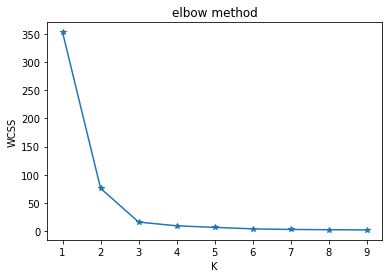

In [33]:
# plot
plt.plot(range(1, 10), wcss , marker = '*')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('elbow method')

In [34]:
# K-Means Clustering 

# specify number of clusters
KM = KMeans(n_clusters=3)
# fit the input data
KM.fit(reduced1)

# get the cluster labels
labels = KM.predict(reduced1)

# Centroid values
cen = KM.cluster_centers_

# cluster values
clusters = KM.labels_.tolist()

In [35]:
# Evaluating the model
from sklearn.metrics import silhouette_score 

silhouette_score(reduced1, clusters)


# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(reduced1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(reduced1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7794760443452271
For n_clusters=3, the silhouette score is 0.72434654668192
For n_clusters=4, the silhouette score is 0.6277557296777447
For n_clusters=5, the silhouette score is 0.6176417139329546
For n_clusters=6, the silhouette score is 0.5876853433419501
For n_clusters=7, the silhouette score is 0.5801147282332154
For n_clusters=8, the silhouette score is 0.5469931360218478


In [36]:
# Make a new dataframe with players' names and their clusters
names = df1.short_name.tolist()
reduced1['cluster'] = clusters
reduced1['name'] = names
reduced1.columns = ['x', 'y', 'cluster', 'name']
reduced1.head()

,x,y,cluster,name
0,-1.728192,-1.421329,0,L. Messi
1,-1.527392,-1.180705,0,Cristiano Ronaldo
2,-1.527290,-1.700590,0,Neymar Jr
3,4.768872,-0.486308,1,J. Oblak
4,-1.493583,-1.510729,0,E. Hazard


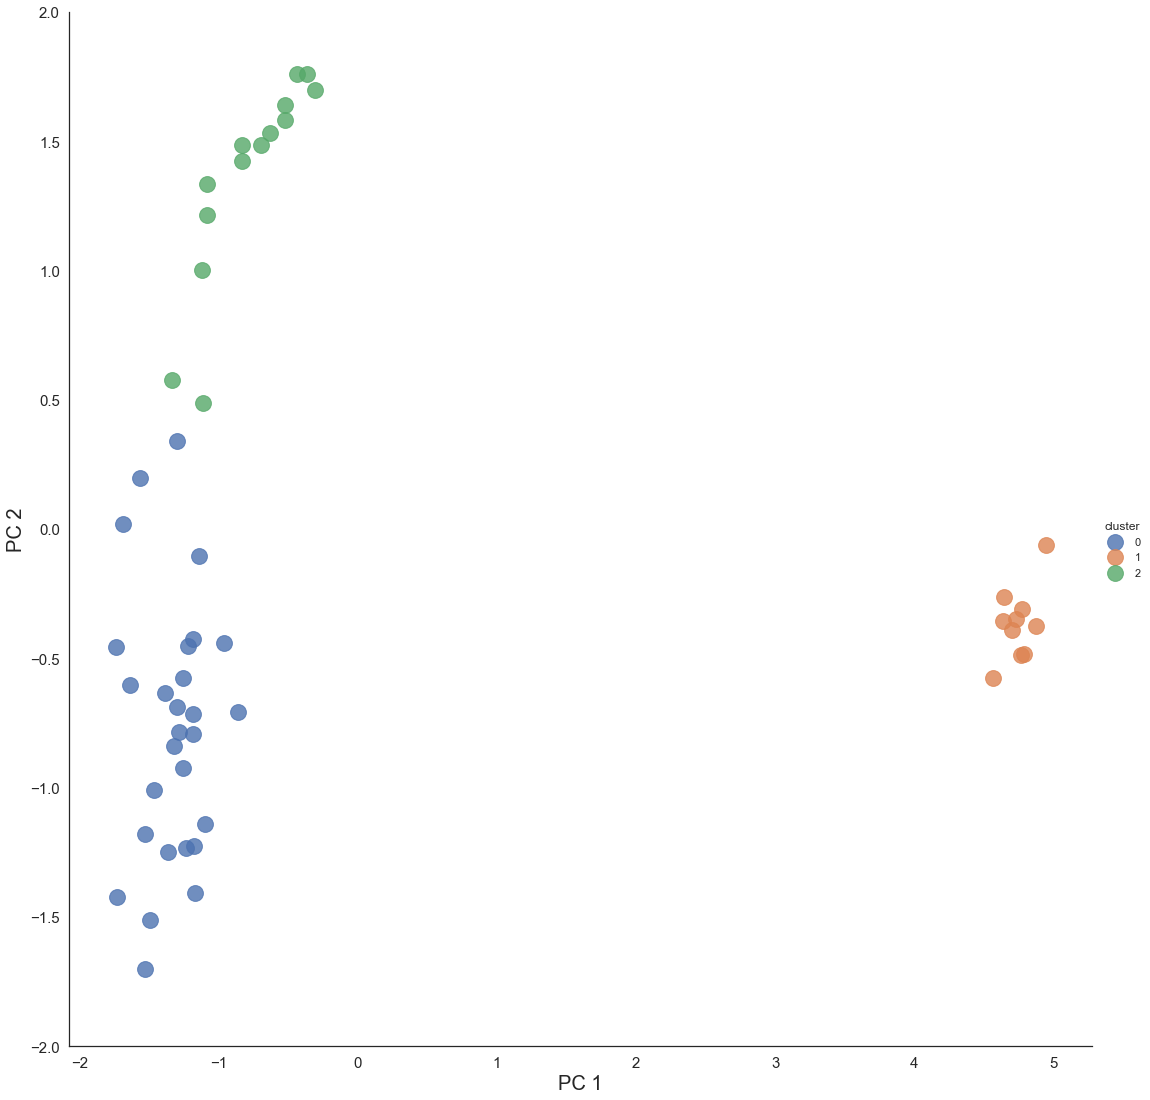

In [37]:
# Visualization
%matplotlib inline

sns.set(style="white")

ax=sns.lmplot(x="x", y="y", hue='cluster', data=reduced1, legend=True,
              fit_reg=False, size=15, scatter_kws={"s": 250})

ax.set(ylim=(-2,2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()


## 2. Hierarchial Clustering

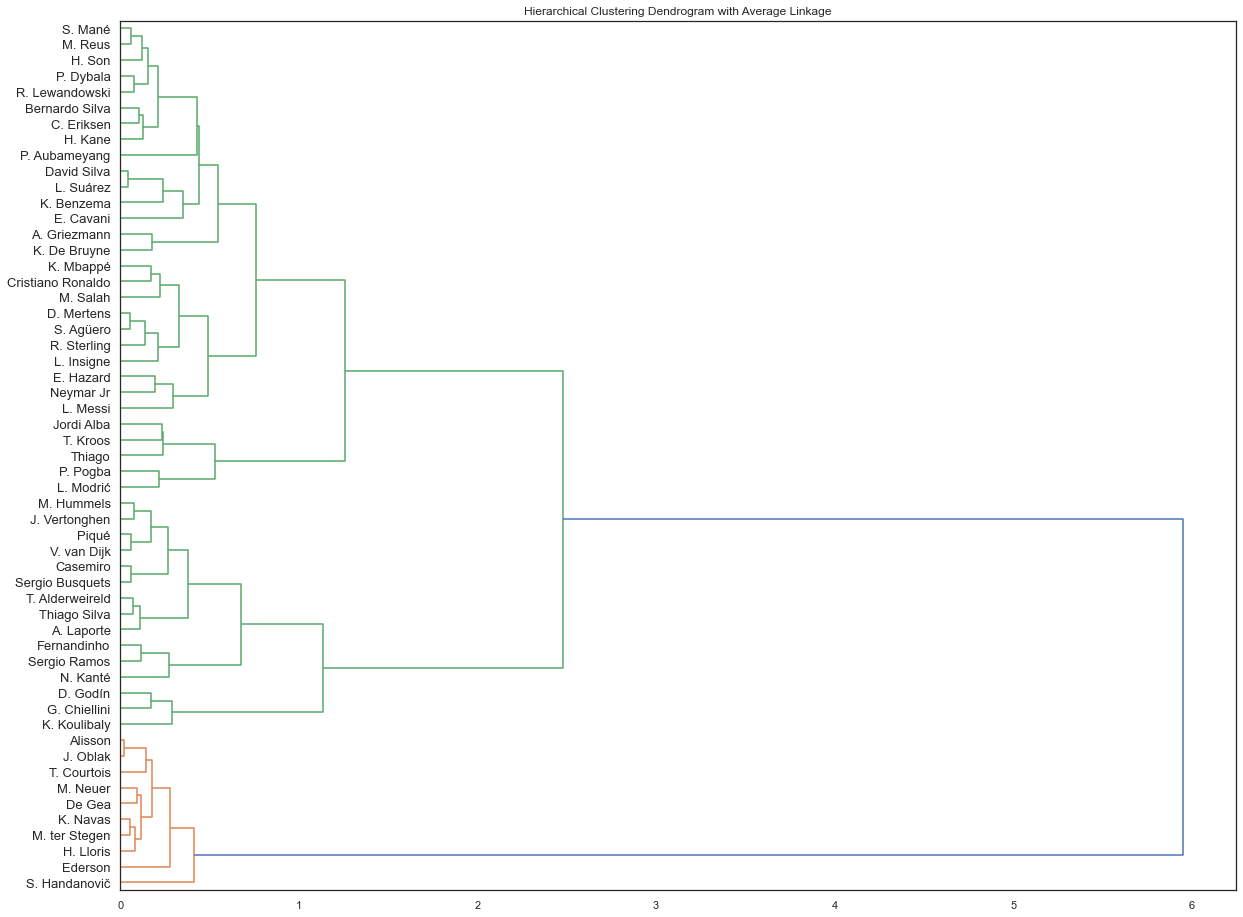

In [38]:
#plot dendrogram using average linkage
reduced2 = pd.DataFrame(pca.fit_transform(x_scaled))

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,16))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram=sch.dendrogram(sch.linkage(reduced2, method="average"), labels=names, leaf_font_size=13, orientation='right')

In [39]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
y_ac = AC.fit_predict(reduced2)

In [40]:
y_ac

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0], dtype=int64)

In [41]:
cluster1 = pd.DataFrame(y_ac)

In [42]:
score = silhouette_score(reduced2, y_ac, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.7297


In [43]:
names = df1.short_name.tolist()
reduced2['cluster'] = cluster1
reduced2['name'] = names
reduced2.columns = ['x', 'y', 'cluster', 'name']
reduced2.head()

,x,y,cluster,name
0,-1.728192,-1.421329,0,L. Messi
1,-1.527392,-1.180705,0,Cristiano Ronaldo
2,-1.527290,-1.700590,0,Neymar Jr
3,4.768872,-0.486308,1,J. Oblak
4,-1.493583,-1.510729,0,E. Hazard


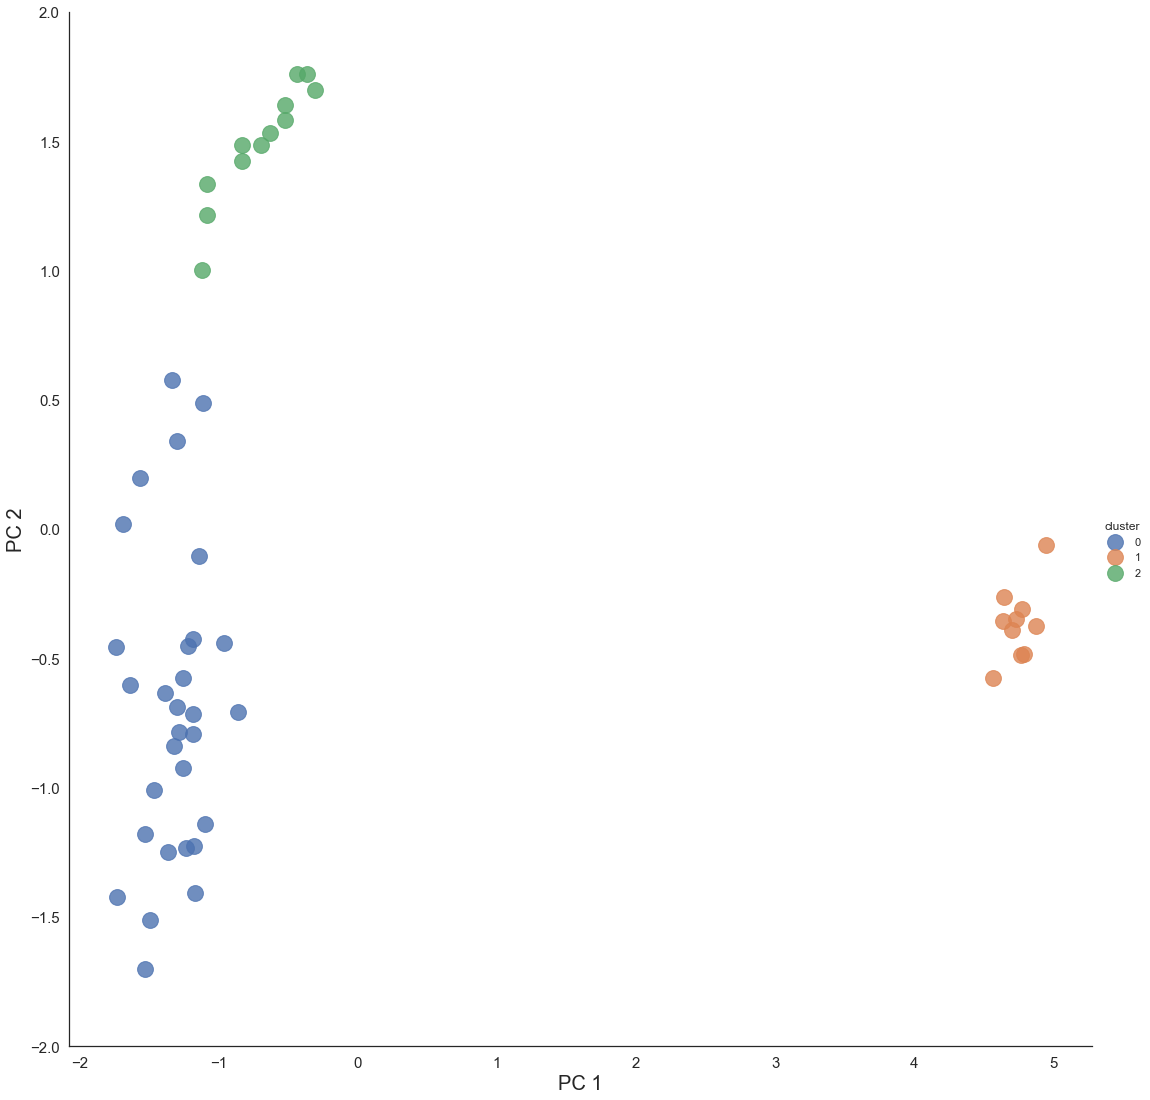

In [44]:
# Visualization
%matplotlib inline

sns.set(style="white")

ax=sns.lmplot(x="x", y="y", hue='cluster', data=reduced2, legend=True,
              fit_reg=False, size=15, scatter_kws={"s": 250})

ax.set(ylim=(-2,2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()

# DBSCAN Algorithm

In [45]:
from sklearn.cluster import DBSCAN
reduced3 = pd.DataFrame(pca.fit_transform(x_scaled))
db = DBSCAN(eps=4, min_samples=10)

# fitting the model
model = db.fit(reduced3)

# to get all the labels(how many group of clusters)
#import sys
labels = model.labels_
#np.set_printoptions(threshold=sys.maxsize)
#labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


In [46]:
# Identifying which points make up our “core points”:
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[db.core_sample_indices_] = True
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [47]:
from sklearn import metrics
#Computing the Silhouette Score

print("Silhoette Coefficient: %0.3f" % metrics.silhouette_score(reduced3, labels))

Silhoette Coefficient: 0.779


In [48]:
reduced3['cluster'] = labels
reduced3['name'] = names
reduced3.columns = ['x', 'y', 'cluster', 'name']
reduced3.head()

,x,y,cluster,name
0,-1.728192,-1.421329,0,L. Messi
1,-1.527392,-1.180705,0,Cristiano Ronaldo
2,-1.527290,-1.700590,0,Neymar Jr
3,4.768872,-0.486308,1,J. Oblak
4,-1.493583,-1.510729,0,E. Hazard


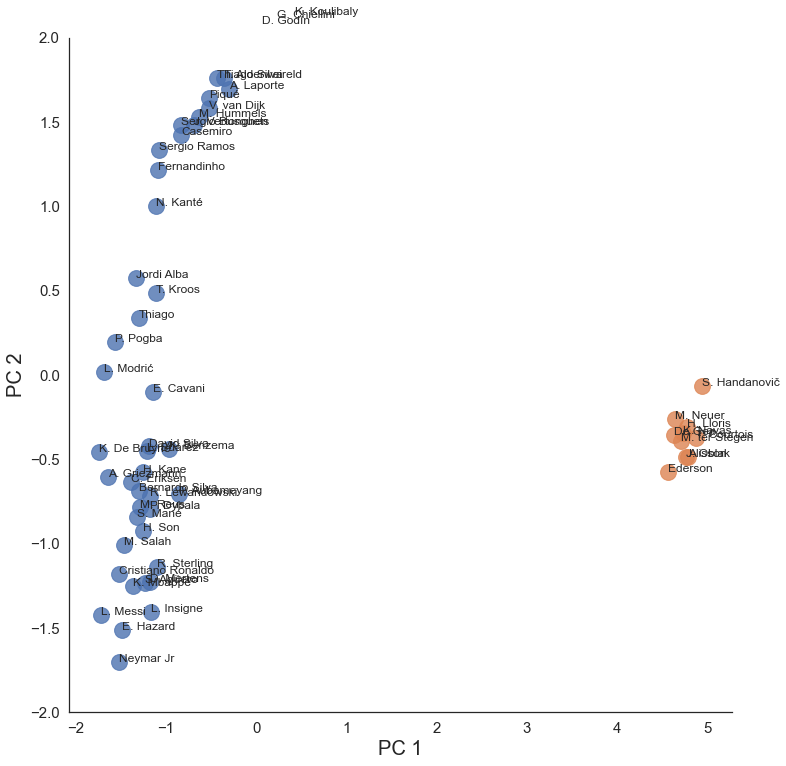

In [49]:
# Visualization of clusters in DBSCAN

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced3, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced3.x, reduced3.y, reduced3.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()


# CONCLUSION:

### By using the FIFA 2020 dataset, we were able to explore and extract the data of the Players concerning their Nationality, Wages, Etc. along with that, the different skills such as defending and shooting of the player are also sorted in the range of highest to lowest. With this Exploratory Analysis and Visualization, we get to know about the player’s nationalities, income, and skills which makes them the renowned players in the world.

### We tried grouping the players into clusters with similar features using different clustering algorithms such as KMeans Clustering, DBSCAN Algorithm and Hierarchial Clustering. For KMeans and Hierarchial clustering, the optimal number of clusters are 3. 

### According to our analysis on the given dataset, KMeans clustering and Hierarchial clustering can perform better in grouping the players.  
